### Relatório de Análise VIII

Identificando e Removendo Outliers

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#plt.rc('figure",figsize=(14,6))

In [6]:
dados = pd.read_csv('aluguel.csv',sep=';')

<Axes: >

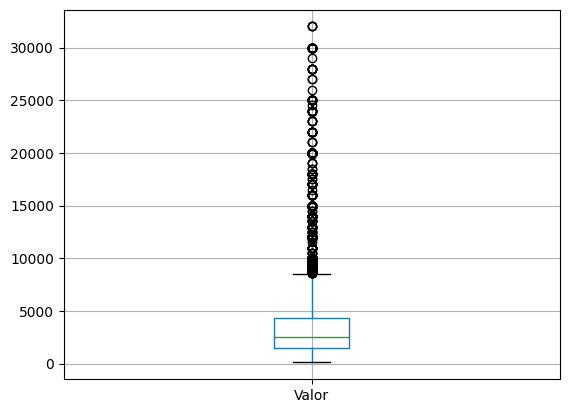

In [7]:
dados.boxplot(['Valor'])

In [11]:
dados[dados['Valor']>=30000]
valor = dados['Valor']

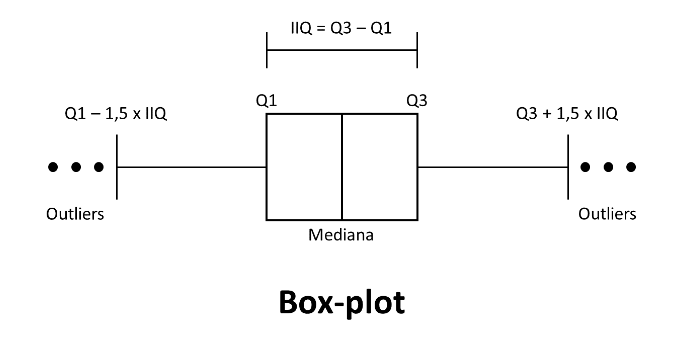

In [12]:
quartil_1 = valor.quantile(.25)
quartil_3 = valor.quantile(.75)
intervalo_inter_quartil = quartil_3 - quartil_1 
limite_inferior = quartil_1 - 1.5 * intervalo_inter_quartil
limite_superior = quartil_1 + 1.5 * intervalo_inter_quartil

In [15]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.3,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.7,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.4,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.7,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19829,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.0,Apartamento
19830,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.1,Apartamento
19831,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.8,Apartamento
19832,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.2,Apartamento


<Axes: >

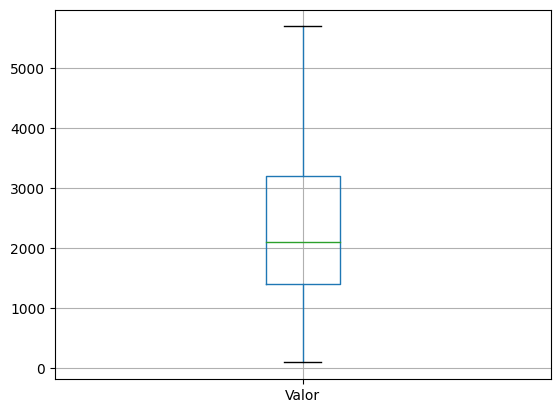

In [16]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

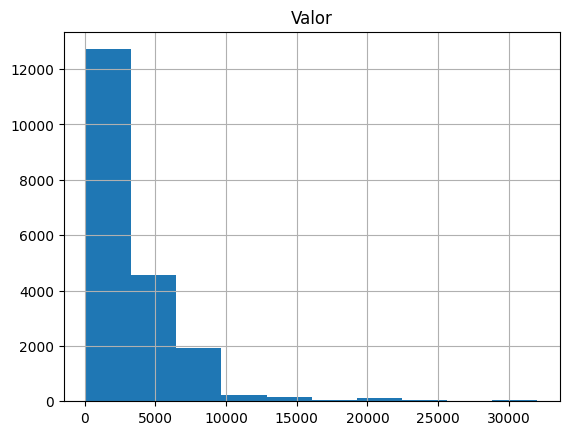

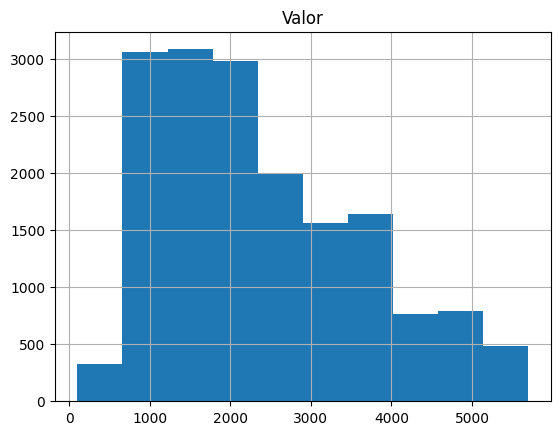

In [17]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

### Exercicios

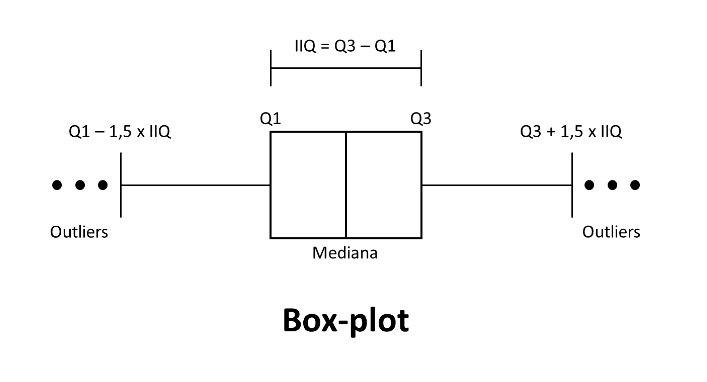

In [18]:
dados_e = pd.read_csv('aluguel_amostra.csv', sep=';')

In [ ]:
valor = dados_e['Valor m2']

In [22]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1 
lim_inferior = Q1 - 1.5 * IIQ
limite_superior = [Q3 + 1.5 * IIQ]

[8500.0]

In [24]:
print(Q1)
print(Q3)
print(IIQ)
print(lim_inferior)
print(limite_superior)

1500.0
4300.0
2800.0
-2700.0
8500.0


In [27]:
selecao = (valor >= Q1) & (valor <= Q3)


In [28]:
dados_f = dados_e[selecao]
dados_e

C:\Users\higor_custodio\AppData\Local\Temp\ipykernel_17280\2482634868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_f = dados_e[selecao]


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<Axes: >

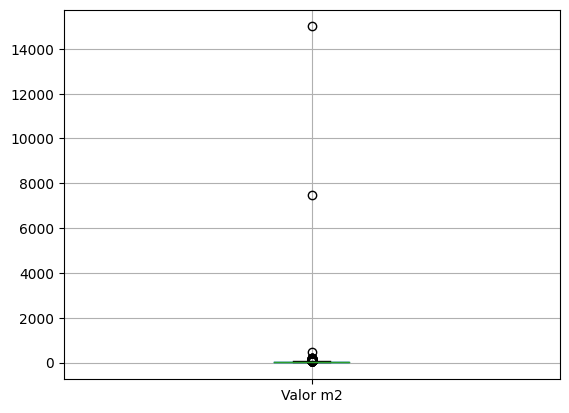

In [32]:
dados_f.boxplot(['Valor m2'])

### Identficando e Removendo Outliers

In [34]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [35]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Casa': [16926, 16927, 16928, 16929, 16930, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16950, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 16971, 16972, 16973, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16982, 16983, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 17005, 17006, 17007, 1700

In [53]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1 
lim_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [38]:
Q1

Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [42]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Casa de Vila           1600.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [41]:
IIQ

Tipo
Apartamento            2400.0
Casa                   6000.0
Casa de Condomínio    11100.0
Casa de Vila            850.0
Quitinete               600.0
Name: Valor, dtype: float64

In [40]:
lim_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [55]:
limite_superior['Casa']

16000.0

In [57]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= lim_inferior[tipo]) & (dados['Valor']<=limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

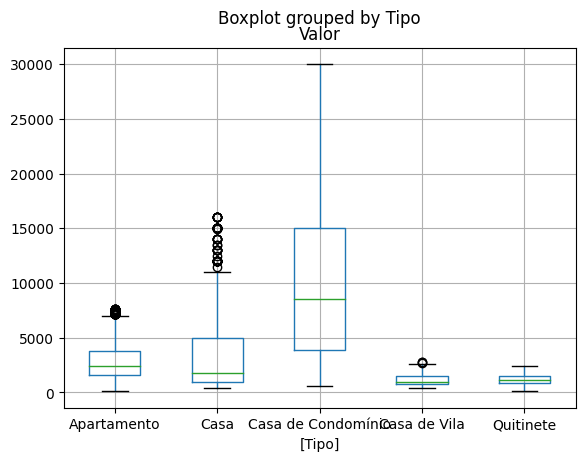

In [59]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [62]:
dados_new.to_csv('../data/aluguel_residencial_sem_outliers.csv', sep=';', index=False)